# 데이터 분석
### 1. 데이터 확인하기

AI 허브에 올라온 감정 분석용 자연어 데이터셋 사용

모두 공포, 놀람, 혐오, 행복, 슬픔, 중립, 분노 7가지의 감정으로 분류되어 있음

In [42]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,509 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [2]:
path = '/content/'
single_talk = pd.read_excel('/content/f0620b4aec05c11d.xlsx')

In [3]:
single_talk.head()

,Sentence,Emotion,Unnamed: 2,Unnamed: 3,Unnamed: 4,공포,5468
0,언니 동생으로 부르는게 맞는 일인가요..??,공포,NaN,NaN,NaN,놀람,5898.0
1,그냥 내 느낌일뿐겠지?,공포,NaN,NaN,NaN,분노,5665.0
2,아직너무초기라서 그런거죠?,공포,NaN,NaN,NaN,슬픔,5267.0
3,유치원버스 사고 낫다던데,공포,NaN,NaN,NaN,중립,4830.0
4,근데 원래이런거맞나요,공포,NaN,NaN,NaN,행복,6037.0


In [4]:
# 단발성 대화 데이터셋 카테고리 별 데이터 개수
single_talk.iloc[:7, 5:]

,공포,5468
0,놀람,5898.0
1,분노,5665.0
2,슬픔,5267.0
3,중립,4830.0
4,행복,6037.0
5,혐오,5429.0
6,Total,38594.0


In [5]:
single_talk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38594 entries, 0 to 38593
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sentence    38594 non-null  object 
 1   Emotion     38594 non-null  object 
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
 5   공포          7 non-null      object 
 6   5468        7 non-null      float64
dtypes: float64(4), object(3)
memory usage: 2.1+ MB


In [6]:
audio_talk = pd.read_csv('/content/5_2.csv', encoding='cp949')
audio_talk.head()

,wav_id,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번감정세기,5번 감정,5번 감정세기,나이,성별,Unnamed: 15,Unnamed: 16,분노,3263
0,5f4141e29dd513131eacee2f,헐! 나 이벤트에 당첨 됐어.,행복,분노,2,놀람,2,행복,2,행복,2,행복,2,48,female,NaN,NaN,혐오,2321.0
1,5f4141f59dd513131eacee30,내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.,행복,중립,0,행복,2,행복,2,행복,2,행복,2,48,female,NaN,NaN,행복,4546.0
2,5f4142119dd513131eacee31,"한 명 뽑는 거였는데, 그게 바로 내가 된 거야.",행복,분노,2,행복,2,행복,2,행복,2,행복,2,48,female,NaN,NaN,슬픔,2848.0
3,5f4142279dd513131eacee32,"당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. ...",행복,분노,2,행복,2,행복,2,행복,2,행복,1,48,female,NaN,NaN,공포,1386.0
4,5f3c9ed98a3c1005aa97c4bd,에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.,중립,행복,2,행복,1,행복,2,행복,1,행복,1,48,female,NaN,NaN,놀람,1755.0


In [7]:
audio_talk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19374 entries, 0 to 19373
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wav_id       19374 non-null  object 
 1   발화문          19374 non-null  object 
 2   상황           19374 non-null  object 
 3   1번 감정        19374 non-null  object 
 4   1번 감정세기      19374 non-null  int64  
 5   2번 감정        19374 non-null  object 
 6   2번 감정세기      19374 non-null  int64  
 7   3번 감정        19374 non-null  object 
 8   3번 감정세기      19374 non-null  int64  
 9   4번 감정        19374 non-null  object 
 10  4번감정세기       19374 non-null  int64  
 11  5번 감정        19374 non-null  object 
 12  5번 감정세기      19374 non-null  int64  
 13  나이           19374 non-null  int64  
 14  성별           19374 non-null  object 
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  분노           7 non-null      object 
 18  3263         7 non-null      float64
dtypes: f

In [8]:
# 감정 분류를 위한 대화 데이터셋 카테고리 별 데이터 개수
audio_talk.iloc[:7, 17:]

,분노,3263
0,혐오,2321.0
1,행복,4546.0
2,슬픔,2848.0
3,공포,1386.0
4,놀람,1755.0
5,중립,3251.0
6,Total,19370.0


In [9]:
continuous_talk = pd.read_excel('/content/한국어_연속적_대화_데이터셋.xlsx')
continuous_talk.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,행복,중립,슬픔,공포,혐오,분노,놀람
0,dialog #,발화,감정,NaN,NaN,1030.0,43786.0,1972.0,98.0,220.0,3628.0,4866.0
1,S,아 진짜! 사무실에서 피지 말라니깐! 간접흡연이 얼마나 안좋은데!,분노,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,그럼 직접흡연하는 난 얼마나 안좋겠니? 안그래? 보면 꼭... 지 생각만 하고.,혐오,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,손님 왔어요.,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,손님? 누구?,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
continuous_talk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55629 entries, 0 to 55628
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10001 non-null  object 
 1   Unnamed: 1  55628 non-null  object 
 2   Unnamed: 2  55622 non-null  object 
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
 5   행복          1 non-null      float64
 6   중립          1 non-null      float64
 7   슬픔          1 non-null      float64
 8   공포          1 non-null      float64
 9   혐오          1 non-null      float64
 10  분노          1 non-null      float64
 11  놀람          1 non-null      float64
dtypes: float64(9), object(3)
memory usage: 5.1+ MB


In [11]:
# 연속적 대화 데이터셋 카테고리 별 데이터 개수
continuous_talk.iloc[:1, 5:]

,행복,중립,슬픔,공포,혐오,분노,놀람
0,1030.0,43786.0,1972.0,98.0,220.0,3628.0,4866.0


### 2. 데이터 전처리

각 데이터셋 중에 중복 데이터 있는지 확인하고, null값 삭제

데이터프레임의 column명을 통일하고 하나의 데이터프레임으로 합치기

#### 2.1. 데이터프레임 column명과 구조 통일하고 하나로 합치기

In [12]:
talk1 = single_talk[['Sentence', 'Emotion']]
talk1['From'] = "단발성 대화"
talk1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sentence,Emotion,From
0,언니 동생으로 부르는게 맞는 일인가요..??,공포,단발성 대화
1,그냥 내 느낌일뿐겠지?,공포,단발성 대화
2,아직너무초기라서 그런거죠?,공포,단발성 대화
3,유치원버스 사고 낫다던데,공포,단발성 대화
4,근데 원래이런거맞나요,공포,단발성 대화
...,...,...,...
38589,솔직히 예보 제대로 못하는 데 세금이라도 아끼게 그냥 폐지해라..,혐오,단발성 대화
38590,재미가 없으니 망하지,혐오,단발성 대화
38591,공장 도시락 비우생적임 아르바이트했는데 화장실가성 손도 않씯고 재료 담고 바닥 떨어...,혐오,단발성 대화
38592,코딱지 만한 나라에서 지들끼리 피터지게 싸우는 센징 클래스 ㅉㅉㅉ,혐오,단발성 대화


In [13]:
talk2 = audio_talk[['발화문', '상황']]
talk2

,발화문,상황
0,헐! 나 이벤트에 당첨 됐어.,행복
1,내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.,행복
2,"한 명 뽑는 거였는데, 그게 바로 내가 된 거야.",행복
3,"당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. ...",행복
4,에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.,중립
...,...,...
19369,나 엘리베이터에 갇혔어.,공포
19370,하지만 기분이 나쁜 걸 어떡해?,분노
19371,자취방 엘리베이턴데 정전인가봐.,공포
19372,나 드디어 프로젝트 끝났어!,행복


In [14]:
talk3 = continuous_talk[['Unnamed: 1', 'Unnamed: 2']]
talk3.columns = talk3.iloc[0]
talk3

,발화,감정
0,발화,감정
1,아 진짜! 사무실에서 피지 말라니깐! 간접흡연이 얼마나 안좋은데!,분노
2,그럼 직접흡연하는 난 얼마나 안좋겠니? 안그래? 보면 꼭... 지 생각만 하고.,혐오
3,손님 왔어요.,중립
4,손님? 누구?,중립
...,...,...
55624,얘긴 다 끝났냐? 원예부,중립
55625,"예. 그거 때문에, 부탁이 있......는......데요.",중립
55626,여자 숨겨달라는거면 사절이다.,중립
55627,아무래도 안되나요?,중립


In [15]:
talk3 = talk3[1:]
talk3

,발화,감정
1,아 진짜! 사무실에서 피지 말라니깐! 간접흡연이 얼마나 안좋은데!,분노
2,그럼 직접흡연하는 난 얼마나 안좋겠니? 안그래? 보면 꼭... 지 생각만 하고.,혐오
3,손님 왔어요.,중립
4,손님? 누구?,중립
5,몰라요. 팀장님 친구래요.,중립
...,...,...
55624,얘긴 다 끝났냐? 원예부,중립
55625,"예. 그거 때문에, 부탁이 있......는......데요.",중립
55626,여자 숨겨달라는거면 사절이다.,중립
55627,아무래도 안되나요?,중립


In [16]:
talk2.columns = ["Sentence", "Emotion"]
talk3.columns = ["Sentence", "Emotion"]
talk2["From"] = "대화 음성"
talk2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Sentence,Emotion,From
0,헐! 나 이벤트에 당첨 됐어.,행복,대화 음성
1,내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.,행복,대화 음성
2,"한 명 뽑는 거였는데, 그게 바로 내가 된 거야.",행복,대화 음성
3,"당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. ...",행복,대화 음성
4,에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.,중립,대화 음성
...,...,...,...
19369,나 엘리베이터에 갇혔어.,공포,대화 음성
19370,하지만 기분이 나쁜 걸 어떡해?,분노,대화 음성
19371,자취방 엘리베이턴데 정전인가봐.,공포,대화 음성
19372,나 드디어 프로젝트 끝났어!,행복,대화 음성


In [17]:
talk3["From"] = "연속성 대화"
talk3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sentence,Emotion,From
1,아 진짜! 사무실에서 피지 말라니깐! 간접흡연이 얼마나 안좋은데!,분노,연속성 대화
2,그럼 직접흡연하는 난 얼마나 안좋겠니? 안그래? 보면 꼭... 지 생각만 하고.,혐오,연속성 대화
3,손님 왔어요.,중립,연속성 대화
4,손님? 누구?,중립,연속성 대화
5,몰라요. 팀장님 친구래요.,중립,연속성 대화
...,...,...,...
55624,얘긴 다 끝났냐? 원예부,중립,연속성 대화
55625,"예. 그거 때문에, 부탁이 있......는......데요.",중립,연속성 대화
55626,여자 숨겨달라는거면 사절이다.,중립,연속성 대화
55627,아무래도 안되나요?,중립,연속성 대화


In [18]:
talk = pd.concat([talk1, talk2, talk3], ignore_index = True)
talk

,Sentence,Emotion,From
0,언니 동생으로 부르는게 맞는 일인가요..??,공포,단발성 대화
1,그냥 내 느낌일뿐겠지?,공포,단발성 대화
2,아직너무초기라서 그런거죠?,공포,단발성 대화
3,유치원버스 사고 낫다던데,공포,단발성 대화
4,근데 원래이런거맞나요,공포,단발성 대화
...,...,...,...
113591,얘긴 다 끝났냐? 원예부,중립,연속성 대화
113592,"예. 그거 때문에, 부탁이 있......는......데요.",중립,연속성 대화
113593,여자 숨겨달라는거면 사절이다.,중립,연속성 대화
113594,아무래도 안되나요?,중립,연속성 대화


In [19]:
talk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113596 entries, 0 to 113595
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Sentence  113595 non-null  object
 1   Emotion   113589 non-null  object
 2   From      113596 non-null  object
dtypes: object(3)
memory usage: 2.6+ MB


#### 2.2. null값 확인하고 삭제하기

In [20]:
talk.isnull().sum()

Sentence    1
Emotion     7
From        0
dtype: int64

In [21]:
talk = talk.dropna()

In [22]:
talk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113589 entries, 0 to 113595
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Sentence  113589 non-null  object
 1   Emotion   113589 non-null  object
 2   From      113589 non-null  object
dtypes: object(3)
memory usage: 3.5+ MB


#### 2.3. 중복된 문장이 있는지 확인하고 삭제하기

In [23]:
talk.duplicated(['Sentence']).sum()

7756

In [24]:
talk_v2 = talk.drop_duplicates(subset=['Sentence'])
talk_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105833 entries, 0 to 113595
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Sentence  105833 non-null  object
 1   Emotion   105833 non-null  object
 2   From      105833 non-null  object
dtypes: object(3)
memory usage: 3.2+ MB


#### 2.4. 라벨링이 잘못된 값이 있는지 확인하고 수정

원래의 감정 분류가 유추가 되는 오타라면 그 감정으로 분류했고, 나머지는 임의로 팀원들과 합의 하에 분류했음

##### 임의 분류 전

|index|Sentence|Emotion|
|---|---|---|
|83004|인터넷에다 팔아야 되나\.. 근데 너 이제 맘 잡았나보다?|ㅍ|
|85144|일부러 그럴 리가 있어요?|ㅍ|
|85915|그럼요?|ㅍ|
|86057|샤프심이 없어서\..가지러 왔다가 누나 보이길래..|ㅍ|
|86422|아~ 자기소개서 쓰기 힘들어 죽겠어요~|ㅍ|
|86449|원래 남자들\..다른 남자랑 친하게 지내면 그러니까..|ㅍ|
|94651|그럼, 임마\! 내가 누구냐? 한번 실수는 병가지상사다~이러시면서 나의 인간성과 품위에 딱! 반하신거지~|ㅍ|
|95228|처리 할거야\. 처리해야지, 그게 돈이 얼만데?|ㅍ|
|95395|와, 어디서 꽁돈이라도 생겼나?|ㅍ|
|95831|엄마, 엄만 결혼이 뭐 그리 좋아?|ㅍ|
|99722|앞으로는 어디서 우연히 마주쳐도 말 섞지 말자\. 비위 상해. 너랑 말 하면.     |ㅍ|
|101118|역시\... 상처받았겠지?|ㅍ|

##### 임의로 분류한 값

|index|Sentence|Emotion|
|---|---|---|
|83004|인터넷에다 팔아야 되나\.. 근데 너 이제 맘 잡았나보다?|중립|
|85144|일부러 그럴 리가 있어요?|중립|
|85915|그럼요?|중립|
|86057|샤프심이 없어서\..가지러 왔다가 누나 보이길래..|중립|
|86422|아~ 자기소개서 쓰기 힘들어 죽겠어요~|중립|
|86449|원래 남자들\..다른 남자랑 친하게 지내면 그러니까..|중립|
|94651|그럼, 임마\! 내가 누구냐? 한번 실수는 병가지상사다~이러시면서 나의 인간성과 품위에 딱! 반하신거지~|중립|
|95228|처리 할거야\. 처리해야지, 그게 돈이 얼만데?|중립|
|95395|와, 어디서 꽁돈이라도 생겼나?|놀람|
|95831|엄마, 엄만 결혼이 뭐 그리 좋아?|중립|
|99722|앞으로는 어디서 우연히 마주쳐도 말 섞지 말자\. 비위 상해. 너랑 말 하면.     |혐오|
|101118|역시\... 상처받았겠지?|중립|

In [25]:
talk_v2['Emotion'].value_counts()

중립     48255
분노     12092
놀람     11223
행복     10626
슬픔      9330
혐오      7577
공포      6709
ㅍ         12
분          4
ㅈ중립        1
분ㄴ         1
중림         1
ㄴ중립        1
줄          1
Name: Emotion, dtype: int64

In [26]:
talk_v2[talk_v2['Emotion']=="ㅍ"]

,Sentence,Emotion,From
83004,인터넷에다 팔아야 되나.. 근데 너 이제 맘 잡았나보다?,ㅍ,연속성 대화
85144,일부러 그럴 리가 있어요?,ㅍ,연속성 대화
85915,그럼요?,ㅍ,연속성 대화
86057,샤프심이 없어서..가지러 왔다가 누나 보이길래..,ㅍ,연속성 대화
86422,아~ 자기소개서 쓰기 힘들어 죽겠어요~,ㅍ,연속성 대화
86449,원래 남자들..다른 남자랑 친하게 지내면 그러니까..,ㅍ,연속성 대화
94651,"그럼, 임마! 내가 누구냐? 한번 실수는 병가지상사다~이러시면서 나의 인간성과 품위...",ㅍ,연속성 대화
95228,"처리 할거야. 처리해야지, 그게 돈이 얼만데?",ㅍ,연속성 대화
95395,"와, 어디서 꽁돈이라도 생겼나?",ㅍ,연속성 대화
95831,"엄마, 엄만 결혼이 뭐 그리 좋아?",ㅍ,연속성 대화


In [27]:
talk_v2.loc[95395]['Emotion'] = "놀람"
talk_v2.loc[95395]

Sentence    와, 어디서 꽁돈이라도 생겼나?
Emotion                    놀람
From                   연속성 대화
Name: 95395, dtype: object

In [28]:
talk_v2.loc[99722]['Emotion'] = "혐오"
talk_v2.loc[99722]

Sentence    앞으로는 어디서 우연히 마주쳐도 말 섞지 말자. 비위 상해. 너랑 말 하면.     
Emotion                                                  혐오
From                                                 연속성 대화
Name: 99722, dtype: object

In [29]:
talk_v3 = talk_v2.replace("ㅍ", "중립")
talk_v3

,Sentence,Emotion,From
0,언니 동생으로 부르는게 맞는 일인가요..??,공포,단발성 대화
1,그냥 내 느낌일뿐겠지?,공포,단발성 대화
2,아직너무초기라서 그런거죠?,공포,단발성 대화
3,유치원버스 사고 낫다던데,공포,단발성 대화
4,근데 원래이런거맞나요,공포,단발성 대화
...,...,...,...
113591,얘긴 다 끝났냐? 원예부,중립,연속성 대화
113592,"예. 그거 때문에, 부탁이 있......는......데요.",중립,연속성 대화
113593,여자 숨겨달라는거면 사절이다.,중립,연속성 대화
113594,아무래도 안되나요?,중립,연속성 대화


In [30]:
talk_v3[talk_v3['Emotion']=="분"]

,Sentence,Emotion,From
88257,지금 그쪽 사정 챙기게 생겼어? 우린 앉아서 그냥 내일 부도맞고? 어?!,분,연속성 대화
93796,내놔요!,분,연속성 대화
93798,얼른 안 내놔요!,분,연속성 대화
109099,그만 자라.,분,연속성 대화


In [31]:
talk_v3[talk_v3['Emotion']=="분ㄴ"]

,Sentence,Emotion,From
58784,근데 이 사람이 정말!,분ㄴ,연속성 대화


In [32]:
talk_v3.replace("분", "분노", inplace=True)
talk_v3.replace("분ㄴ", "분노", inplace=True)

In [33]:
talk_v3[talk_v3['Emotion']=="줄"]

,Sentence,Emotion,From
108952,용량 너무 적은 거 아니냐...... 자석 가져다 대지 말라고. 다 까먹을 테니까.,줄,연속성 대화


In [34]:
talk_v3[talk_v3['Emotion']=="ㅈ중립"]

,Sentence,Emotion,From
58406,음… 가게에는 딱히 마음에 드는 게 없어서 책자를 좀 봐야겠네요.,ㅈ중립,연속성 대화


In [35]:
talk_v3[talk_v3['Emotion']=="중림"]

,Sentence,Emotion,From
60180,"너는 내가 그런 말을 듣고 상처 입을 거라든가, 그런 생각은 안 해?",중림,연속성 대화


In [36]:
talk_v3[talk_v3['Emotion']=="ㄴ중립"]

,Sentence,Emotion,From
86406,싫어도 가. 가서 주말까지만 있다 와.,ㄴ중립,연속성 대화


In [37]:
talk_v3.replace("줄", "중립", inplace=True)
talk_v3.replace("ㅈ중립", "중립", inplace=True)
talk_v3.replace("중림", "중립", inplace=True)
talk_v3.replace("ㄴ중립", "중립", inplace=True)

In [38]:
talk_v3['Emotion'].value_counts()

중립    48269
분노    12097
놀람    11224
행복    10626
슬픔     9330
혐오     7578
공포     6709
Name: Emotion, dtype: int64

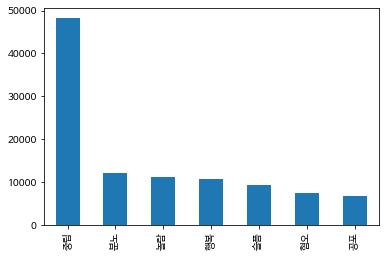

In [41]:
talk_v3['Emotion'].value_counts().plot(kind='bar')

In [42]:
talk_v3.to_csv("sentiment_data.csv", encoding="utf-8-sig")